In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('tips.csv')
features = np.array(df.total_bill)
labels = np.array(df.tip)

In [15]:
def kernel(data, point, xmat, k):
    m, n = np.shape(xmat)
    ws = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - data[j]
        ws[j, j] = np.exp(diff*diff.T/(-2.0*k**2))
    return ws


In [16]:
def local_weight(data, point, xmat, ymat, k):
    wei = kernel(data, point, xmat, k)
    return (data.T*(wei*data)).I*(data.T*(wei*ymat.T))

In [17]:
def local_weight_regression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*local_weight(xmat, xmat[i], xmat, ymat, k)
    return ypred

In [18]:
m = features.shape[0]
mtip = np.mat(labels)
data = np.hstack((np.ones((m,1)), np.mat(features).T))

In [19]:
ypred = local_weight_regression(data, mtip, 0.5)
indices = data[:,1].argsort(0)
xsort = data[indices][:,0]

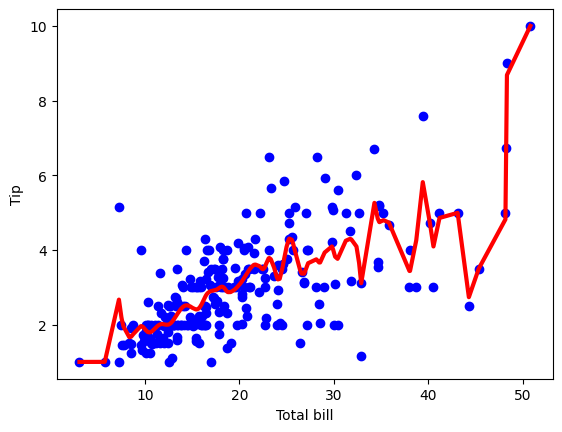

In [20]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(features, labels, color='blue')
ax.plot(xsort[:,1],ypred[indices], color = 'red', linewidth=3)

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

